In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com

import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path1 = 

In [3]:
fau = pd.read_csv(path1)
fau['treatment'] = fau['type'].map(dict(zip(['laureate' , 'non laureate'] , [1 , 0])))

In [4]:
data = fau[['pub_num','h','g', 'tc','DC','CC', 'dh', 'ch','type']].copy()

In [5]:
data['mc'] = data['tc']/data['pub_num']

In [6]:
d1 = data[data['type'] == 'laureate'].copy()
d2 = data[data['type'] == 'non laureate'].copy()
d1.index = range(len(d1))
d2.index = range(len(d2))

In [7]:
def get_control_group(d1, d2, da):
    lst = []
    for n in d1[da].values:
        diff = np.abs(d2[da] - n)
        idx = diff.idxmin()
        lst.append(idx)
    d3 = d2.iloc[lst, :].copy()
    return d3

In [9]:
d31 = get_control_group(d1,d2,'tc')
d31['type'] = 'control c'
dd1 = pd.concat([d1,d31])

d32 = get_control_group(d1,d2,'h')
d32['type'] = 'control h'
dd2 = pd.concat([d1,d32])

d33 = get_control_group(d1,d2,'g')
d33['type'] = 'control g'
dd3 = pd.concat([d1,d33])

In [27]:
labels = ['SDC','D h-index','SCC','C h-index']
valst = ['DC','dh','CC','ch']

palettes = [['#21618C','#D35400'],['#21618C','#943126'],['#21618C','#138D75']]

controllst = ['tc','h','g']
ddlst = [dd1,dd2,dd3]

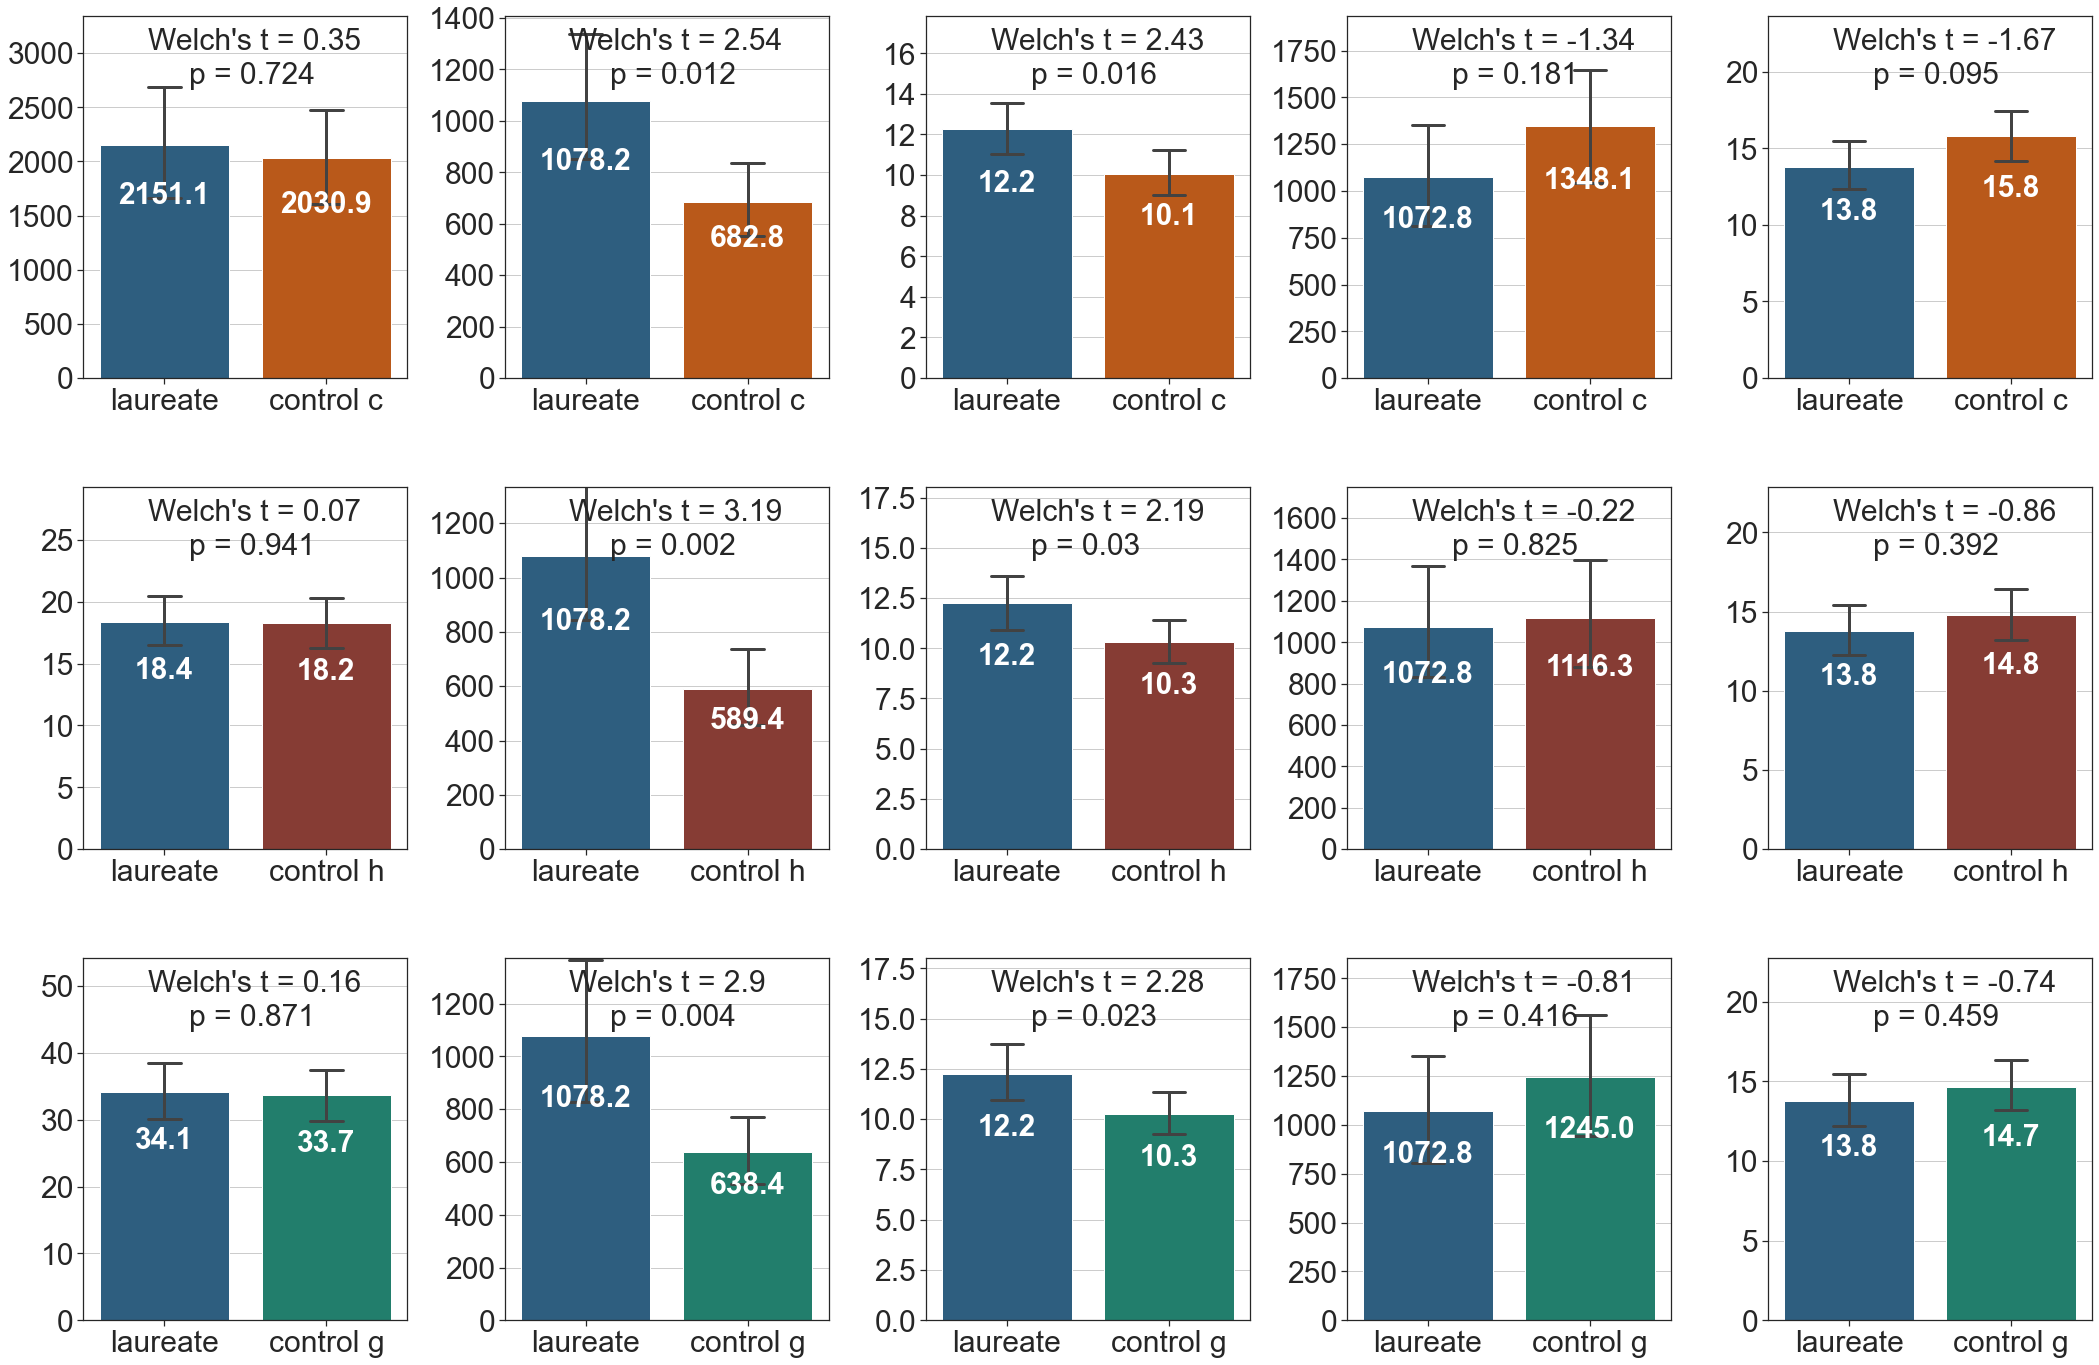

In [39]:
plt.subplots(3,5,figsize=(36,24))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.3)
sns.set_theme(style="ticks")

for i in range(3):
    ax = plt.subplot(3, 5, i*5+1)
    data = ddlst[i]
    sns.barplot(data=data, x="type", y=controllst[i], errwidth=3, capsize=.2, palette=palettes[i])
    ax.yaxis.grid(True)
    t, p = scipy.stats.ttest_ind(data[data['type']=='laureate'][controllst[i]].dropna(),
                                  data[data['type']!='laureate'][controllst[i]].dropna(),
                                  equal_var=False, alternative='two-sided')

    plt.text(-0.1, np.mean(data[controllst[i]])*1.45, "Welch's t = {}".format(np.around(t, 2)), fontsize=30)
    plt.text(0.15, np.mean(data[controllst[i]])*1.3, "p = {}".format(np.around(p, 3)), fontsize=30)

    plt.text(0, np.mean(data[data['type']=='laureate'][controllst[i]])*0.75, 
             "{}".format(np.around(np.mean(data[data['type']=='laureate'][controllst[i]]), 1)),c = 'white', fontsize=30, ha='center', fontweight='bold')
    plt.text(1, np.mean(data[data['type']!='laureate'][controllst[i]])*0.75,
             "{}".format(np.around(np.mean(data[data['type']!='laureate'][controllst[i]]), 1)),c = 'white', fontsize=30, ha='center', fontweight='bold')

    plt.ylim((0, np.mean(data[controllst[i]])*1.6))
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel('')
    plt.ylabel('')

    for j in range(4):
        ax = plt.subplot(3, 5, i*5+j+2)
        sns.barplot(data=data, x="type", y=valst[j], errwidth=3, capsize=.2, palette=palettes[i])
        ax.yaxis.grid(True)   
        t, p = scipy.stats.ttest_ind(data[data['type']=='laureate'][valst[j]].dropna(),
                                      data[data['type']!='laureate'][valst[j]].dropna(),
                                      equal_var=False, alternative='two-sided')
        plt.text(-0.1, np.mean(data[valst[j]])*1.45, "Welch's t = {}".format(np.around(t, 2)), fontsize=30)
        plt.text(0.15, np.mean(data[valst[j]])*1.3, "p = {}".format(np.around(p, 3)), fontsize=30)

        plt.text(0, np.mean(data[data['type']=='laureate'][valst[j]])*0.75,
                 "{}".format(np.around(np.mean(data[data['type']=='laureate'][valst[j]]), 1)),c = 'white', fontsize=30, ha='center', fontweight='bold')
        plt.text(1, np.mean(data[data['type']!='laureate'][valst[j]])*0.75,
                 "{}".format(np.around(np.mean(data[data['type']!='laureate'][valst[j]]), 1)),c = 'white', fontsize=30, ha='center', fontweight='bold')

        plt.ylim((0, np.mean(data[valst[j]])*1.6))
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.xlabel('')
        plt.ylabel('')